In [1]:
import networkx as nx
import random
import numpy as np

def random_walk(G):
    nodes = list(G.nodes())
    points_RW = [0 for _ in range(G.number_of_nodes())]
    r = random.choice(nodes)
    points_RW[r] += 1
    out = list(G.out_edges(r))

    c = 0
    while c != 10000:
        if len(out) == 0:
            focus = random.choice(nodes)
        else:
            r1 = random.choice(out)
            focus = r1[1]

        points_RW[focus] += 1
        out = list(G.out_edges(focus))
        c += 1
    return points_RW

G = nx.DiGraph()
nodes = [i for i in range(0,5)]
labels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E'}  
edges = [(0,1), (1,2), (3,0), (3,2), (3,4), (4,0)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)         
    
points_RW = random_walk(G)
    
points_RW_array = np.array(points_RW)
nodes_sorted_by_RW = np.argsort(-points_RW_array)
    
print("Nodes ranked by Random Walk:", end = ' ')
for node_index in nodes_sorted_by_RW:
    print(labels[node_index], end = ' ')

Nodes ranked by Random Walk: C B A E D 

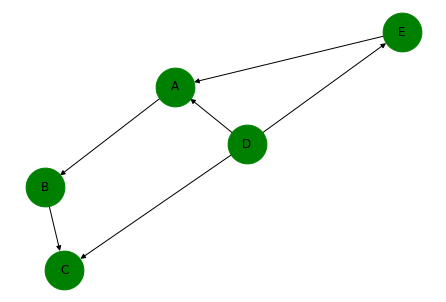

In [3]:
import matplotlib.pyplot as plt
nx.draw(G, node_size = 1500, labels = labels, node_color = "G", with_labels = True)
plt.show()